In [38]:
import cobra
import cobra.test #Older version of COBRApy
import cometspy as c
import numpy as np
from matplotlib import pyplot as plt
import os

os.environ['GUROBI_HOME'] = '/gurobi12.0.1_macos_universal2.pkg'

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


ModuleNotFoundError: No module named 'cobra.test'

In [39]:

# Set the COMETS_HOME environment variable (replace with your actual path)
os.environ['COMETS_HOME'] = 'comets.py' #'/path/to/your/comets/installation'
#os.environ['GUROBI_HOME'] = '/Users/kristineyoo/Desktop/gurobi'

# Load the E. coli core model
#core = cobra.test.create_test_model("textbook") #older version of COBRApy
core = cobra.io.load_model('textbook')


In [34]:


# Convert to COMETS model
ecoli = c.model(core)
ecoli.open_exchanges()
ecoli.add_convection_parameters(packedDensity = 0.022,
                                    elasticModulus = 1.e-10,
                                    frictionConstant = 1.0,
                                    convDiffConstant = 0.0)
ecoli.add_noise_variance_parameter(100.)

ecoli.initial_pop = [[140, 50, 1.e-6],
                    [58, 162, 1.e-6],
                    [28,55,1.e-6],
                    [132, 78, 1.e-6],
                    [85, 152, 1.e-6],
                    [73, 123, 1.e-6],
                    [34, 76, 1.e-6],
                    [150, 45, 1.e-6],
                     [120, 73, 1.e-6],
                     [34, 138, 1.e-6],
                     [44, 180, 1.e-6],
                     [180, 150, 1.e-6],
                     [165, 135, 1.e-6],
                     [24, 38, 1.e-6],
                     [44, 45, 1.e-6],
                     [99, 108, 1.e-6],
                     [95, 23, 1.e-6],
                     [35, 101, 1.e-6],
                     [25, 102, 1.e-6]]


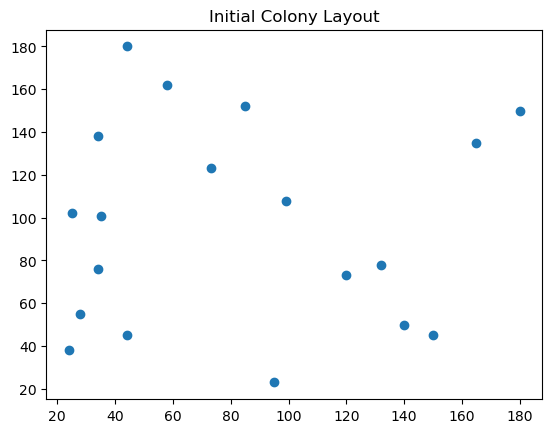

In [35]:
# Colony Layout
def plot_layout():
    plt.scatter(*zip(*[pos[:2] for pos in ecoli.initial_pop]))
    plt.title("Initial Colony Layout")
    plt.show()
plot_layout()

# Define the grid size and region map
width = 200
grid_size = [width, width]
region_map = np.zeros(grid_size, dtype = int)
region_map[:] = 1
region_map[int(width/2):width,:] = 2

# Create the layout
ly = c.layout([ecoli])
ly.grid = grid_size
ly.set_region_map(region_map)


In [36]:
# Define region-specific parameters
num_mets = ly.media.shape[0]
diffusion_constant_region1 = [5.e-6] * num_mets
diffusion_constant_region2 = [5.e-7] * num_mets
friction_constant = 1.0

ly.set_region_parameters(1, diffusion_constant_region1, friction_constant)
ly.set_region_parameters(2, diffusion_constant_region2, friction_constant)

# Set media concentrations
ly.set_specific_metabolite("glc__D_e", 5.e-5)
ly.set_specific_metabolite("h2o_e", 1000.)
ly.set_specific_metabolite("nh4_e", 1000.)
ly.set_specific_metabolite("h_e", 1000.)
ly.set_specific_metabolite("pi_e", 1000.)
ly.display_current_media()

# Parameters
p = c.params()
p.all_params["maxCycles"] = 5000
p.all_params["biomassMotionStyle"] = "Convection 2D"
p.all_params["writeBiomassLog"] = True
p.all_params["BiomassLogRate"] = p.all_params["maxCycles"]
p.all_params["defaultKm"] = 0.01
p.all_params["defaultVmax"] = 10
p.all_params["timeStep"] = 0.01
p.all_params["spaceWidth"] = 0.02
p.all_params["maxSpaceBiomass"] = 10
p.all_params["minSpaceBiomass"] = 1.e-10
p.all_params["allowCellOverlap"] = True
p.all_params["writeFluxLog"] = True
p.all_params["FluxLogRate"] = p.all_params["maxCycles"]
p.all_params["writeMediaLog"] = True
p.all_params["MediaLogRate"] = p.all_params["maxCycles"]


      diff_c g_refresh g_static g_static_val init_amount metabolite
8   0.000005         0        0            0     0.00005   glc__D_e
11  0.000005         0        0            0      1000.0      h2o_e
12  0.000005         0        0            0      1000.0        h_e
15  0.000005         0        0            0      1000.0      nh4_e
17  0.000005         0        0            0      1000.0       pi_e


In [37]:

# Run the simulation
sim = c.comets(ly, p)
sim.run()

FileNotFoundError: [Errno 2] No such file or directory: 'comets.py/bin'